# Exercícios

### 1- Implemente o classificador `1-Vizinho mais próximo` de forma que execute da seguinte forma:

#### - Seja uma função e receba como argumento o conjunto de conhecimento e os dados a serem classificados.
#### - - Por exemplo: `umVizinhoProximo(base_conhecimento, registros_para_classificar)`
#### - Retorne uma lista de rótulos na mesma ordem que os registros para classificar. Assim, o primeiro item da lista seja o rótulo do primeiro registro
#### - Classifique todos os registro de maneira iterativa e independente da quantidade
#### - Em caso de empate, defina uma regra de desempate

In [57]:
import pandas as pd
import matplotlib as plt
import math

def euclidean_distance(val1, val2, tamanho):
    distance = 0
    for x in range(tamanho):
        distance += pow((val1[x] - val2[x]), 2)
    return math.sqrt(distance)

dados = pd.read_csv('/content/base_conhecimento.csv')
base_conhecimento = dados.values.tolist()

classificar = pd.read_csv('/content/registros_para_classificar.csv')
registros_para_classificar = classificar.values.tolist()

def onenn(base_conhecimento, registros_para_classificar):
    rotulos_classificados = []
    for registro_para_classificar in registros_para_classificar:
        menor_distancia = float('inf')
        rotulo_mais_proximo = None
        features_registro_para_classificar = registro_para_classificar[:]
        for registro_conhecimento in base_conhecimento:
            features_registro_conhecimento = registro_conhecimento[:-1]
            distancia = euclidean_distance(features_registro_para_classificar, features_registro_conhecimento, len(features_registro_para_classificar))
            if distancia < menor_distancia:
                menor_distancia = distancia
                rotulo_mais_proximo = registro_conhecimento[-1]

        rotulos_classificados.append(rotulo_mais_proximo)
    return rotulos_classificados
resultados_1nn = onenn(base_conhecimento, registros_para_classificar)
print(resultados_1nn)

['Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa']


### 2- Altere a implementação anterior para que possa ser indicado quantos vizinhos (k) deseja-se considerar, de forma que execute da seguinte forma:

#### - Seja uma função e receba como argumento o conjunto de conhecimento, os dados a serem classificados e quantos vizinhos deve considerar para tomar a decisão sobre qual rótulo indicar para o registro. Nesse caso, é computado a distância para todos os registros na base de conhecimento, em seguida, use os k vizinhos mais próximos para verificar qual dos rótulos aparece mais vezes. O rótulo que aparecer mais vezes é utilizado para rotular o registro em questão.
#### - - Por exemplo: `kVizinhoProximo(base_conhecimento, registros_para_classificar, k)`
#### - Retorne uma lista de rótulos na mesma ordem que os registros para classificar. Assim, o primeiro item da lista seja o rótulo do primeiro registro
#### - Classifique todos os registro de maneira iterativa e independente da quantidade
#### - Em caso de empate, defina uma regra de desempate

In [59]:
from collections import Counter
def kVizinhoProximo(base_conhecimento, registros_para_classificar, k):
  rotulos_classificados = []
  for registro_para_classificar in registros_para_classificar:
      distancias = []
      for registro_conhecimento in base_conhecimento:
          dist = euclidean_distance(registro_para_classificar, registro_conhecimento[:-1], len(registro_para_classificar))
          distancias.append((dist, registro_conhecimento[-1]))
      distancias.sort()
      k_vizinhos = distancias[:k]
      rotulos_vizinhos = [vizinho[1] for vizinho in k_vizinhos]
      contagem_rotulos = Counter(rotulos_vizinhos)
      rotulo_mais_proximo = contagem_rotulos.most_common(1)[0][0]

      rotulos_classificados.append(rotulo_mais_proximo)

  return rotulos_classificados
k = 3
resultados_knn = kVizinhoProximo(base_conhecimento, registros_para_classificar, k)
classificar_df = pd.DataFrame(registros_para_classificar, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
classificar_df['especie aproximada'] = resultados_knn
display(classificar_df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,especie aproximada
0,6.4,3.2,5.3,2.3,Iris-virginica
1,6.0,3.0,4.8,1.8,Iris-virginica
2,7.9,3.8,6.4,2.0,Iris-virginica
3,7.2,3.6,6.1,2.5,Iris-virginica
4,5.1,3.5,1.4,0.2,Iris-setosa
5,6.5,3.0,5.5,1.8,Iris-virginica
6,5.5,4.2,1.4,0.2,Iris-setosa
7,5.1,3.8,1.6,0.2,Iris-setosa
8,5.8,2.6,4.0,1.2,Iris-versicolor
9,7.7,2.8,6.7,2.0,Iris-virginica


### 3- Com quantos k vizinhos conseguiu a maior quantidade de acerto?

In [60]:
resposta_df = pd.read_csv('/content/respostas_em_ordem.csv')
respostas_verdadeiras = resposta_df.values.flatten().tolist()

## Resposta ideal

#### A resposta correta para cada registro está no arquivo `respostas_em_ordem.csv`

,k,precisao
0,1,0.954545
1,2,0.954545
2,3,0.954545
3,4,0.954545
4,5,0.954545
5,6,0.954545
6,7,0.954545
7,8,0.954545
8,9,0.954545
9,10,0.954545


k           15.0
precisao     1.0
Name: 14, dtype: float64


<Axes: xlabel='k'>

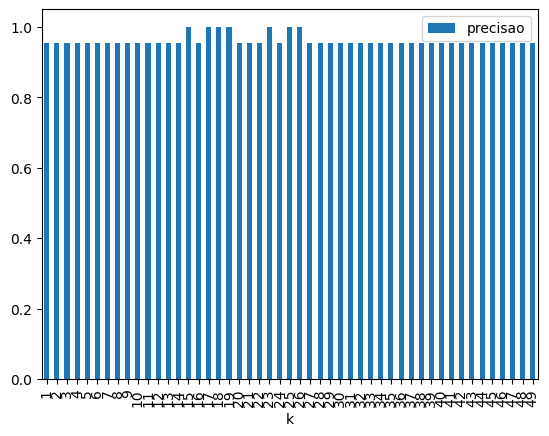

In [61]:
resultadosk = []
for k in range(1, 50):
  resultados_knn = kVizinhoProximo(base_conhecimento, registros_para_classificar, k)
  resultadosk.append(resultados_knn)
acuracia = []
for predicaoknn in resultadosk:
  correct_predictions = 0
  for i in range(len(predicaoknn)):
      if predicaoknn[i] == respostas_verdadeiras[i]:
          correct_predictions += 1
  acc = correct_predictions / len(respostas_verdadeiras)
  acuracia.append(acc)

results = []
for k in range(1, 50):
  results.append({'k': k, 'precisao': acuracia[k-1]})

accuracy_df = pd.DataFrame(results)
display(accuracy_df)
print(accuracy_df.iloc[accuracy_df['precisao'].idxmax()])
accuracy_df.plot(x='k', y='precisao', kind='bar')